In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import itertools
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

## Leitura e Split dos Dados

In [2]:
# leitura do arquivo .csv
df_features = pd.read_csv('features_2.csv', sep=';')
df_features.head()

bandwidth_kurtosis  bandwidth_mean  bandwidth_skew  bandwidth_std  \
0            0.792825     3072.275133       -1.201043     507.373242   
1           -0.036886     3108.915592       -0.024222     474.607726   
2           -0.035471     2882.196422        0.507558     516.427608   
3           -0.676834     2769.930595       -0.005707     505.898959   
4           -0.415972     2986.595010       -0.510374     542.023823   

   centroid_kurtosis  centroid_mean  centroid_skew  centroid_std  \
0          -0.381658    2891.428242      -0.181103    927.581419   
1          -0.275559    3004.068629       0.356506    926.389547   
2           1.138507    2707.773790       1.216916   1150.399104   
3           1.717588    2484.916583       1.299290   1124.511334   
4          -0.832082    2609.975944       0.112207    923.236585   

   chroma_kurtosis  chroma_mean  ...  rmse_std  roloff_kurtosis  roloff_mean  \
0        -0.996609     0.425177  ...  0.062612        -0.297401  6602.908278   
1        -0.967589     0.432395  ...  0.059313        -0.708399  6694.672852   
2        -0.820446     0.411499  ...  0.048298        -0.871476  5628.779297   
3        -0.655082     0.376489  ...  0.049686        -0.925599  5121.589543   
4        -0.952736     0.410691  ...  0.058376        -0.958447  5969.666466   

   roloff_skew   roloff_std       tempo  zcr_kurtosis  zcr_mean  zcr_skew  \
0    -0.864370  2199.022393  172.265625      1.592372  0.116526  1.002750   
1    -0.429503  2034.134902  172.265625      1.310963  0.120320  0.941287   
2     0.228863  2278.133044  172.265625      6.739282  0.109788  2.212498   
3     0.220824  2375.281410  172.265625      9.388941  0.101765  2.606648   
4    -0.532559  2395.954406  172.265625     -0.388210  0.097341  0.692448   

    zcr_std  
0  0.067756  
1  0.061194  
2  0.071455  
3  0.071890  
4  0.055044  

[5 rows x 82 columns]

In [3]:
# salvamos a coluna com os generos como sendo nosso y
y = df_features[["genre"]]
y.head()

genre
0      6
1      6
2      6
3      6
4      6

In [4]:
# com excecao da coluna com os generos as demais serao usadas como X
X = df_features.drop(['genre'], axis=1)
X.head()

bandwidth_kurtosis  bandwidth_mean  bandwidth_skew  bandwidth_std  \
0            0.792825     3072.275133       -1.201043     507.373242   
1           -0.036886     3108.915592       -0.024222     474.607726   
2           -0.035471     2882.196422        0.507558     516.427608   
3           -0.676834     2769.930595       -0.005707     505.898959   
4           -0.415972     2986.595010       -0.510374     542.023823   

   centroid_kurtosis  centroid_mean  centroid_skew  centroid_std  \
0          -0.381658    2891.428242      -0.181103    927.581419   
1          -0.275559    3004.068629       0.356506    926.389547   
2           1.138507    2707.773790       1.216916   1150.399104   
3           1.717588    2484.916583       1.299290   1124.511334   
4          -0.832082    2609.975944       0.112207    923.236585   

   chroma_kurtosis  chroma_mean  ...  rmse_std  roloff_kurtosis  roloff_mean  \
0        -0.996609     0.425177  ...  0.062612        -0.297401  6602.908278   
1        -0.967589     0.432395  ...  0.059313        -0.708399  6694.672852   
2        -0.820446     0.411499  ...  0.048298        -0.871476  5628.779297   
3        -0.655082     0.376489  ...  0.049686        -0.925599  5121.589543   
4        -0.952736     0.410691  ...  0.058376        -0.958447  5969.666466   

   roloff_skew   roloff_std       tempo  zcr_kurtosis  zcr_mean  zcr_skew  \
0    -0.864370  2199.022393  172.265625      1.592372  0.116526  1.002750   
1    -0.429503  2034.134902  172.265625      1.310963  0.120320  0.941287   
2     0.228863  2278.133044  172.265625      6.739282  0.109788  2.212498   
3     0.220824  2375.281410  172.265625      9.388941  0.101765  2.606648   
4    -0.532559  2395.954406  172.265625     -0.388210  0.097341  0.692448   

    zcr_std  
0  0.067756  
1  0.061194  
2  0.071455  
3  0.071890  
4  0.055044  

[5 rows x 81 columns]

### Normalização

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Elbow Curve

In [6]:
num_clusters = range(1, 15)

In [7]:
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [8]:
distortions = []
for k in kmeans:
    k.fit(X)
    distortions.append(sum(np.min(cdist(X, k.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

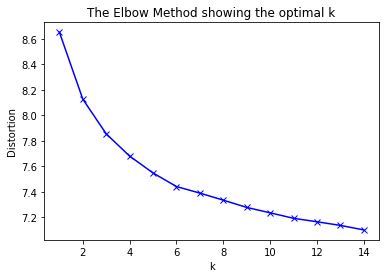

In [9]:
# Plot the elbow
plt.plot(num_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

O melhor número de clusters para o K-means é o "cotovelo" ou a região dobrada. Depois desse ponto, é geralmente estabelecido que adicionar mais clusters não adicionará valor significativo à sua análise. Analisando o gráfico acima podemos concluir que o número ótimo de clusters é algo entre 6 e 8, portanto, usaremos 7 clusters.

## K Means

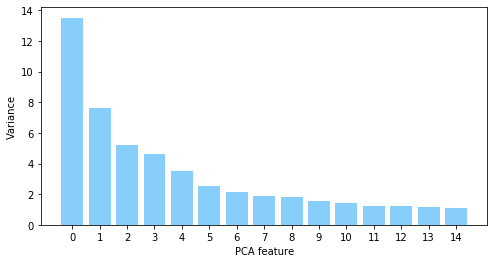

In [10]:
# checando o numero otimo de features
pca = PCA(random_state=123)
pca.fit(X)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

O numero de features ideal seriam duas.

In [11]:
pca = PCA(n_components=2, random_state=123)
data_reduced = pca.fit_transform(X)
print('Shape dos novos dados de X: ' + str(data_reduced.shape))

Shape dos novos dados de X: (19958, 2)


In [12]:
# cria o objeto Kmeans com o numero de clusters
kmeans = KMeans(n_clusters=7)

In [13]:
# faz o predict usando a tecnica KMeans
y_km = kmeans.fit_predict(data_reduced)

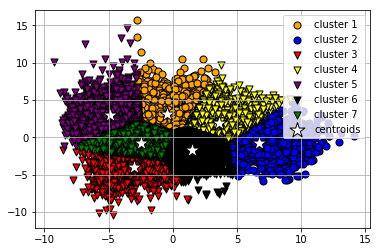

In [101]:
# plota os clusters encontrados
plt.scatter(
    data_reduced[y_km == 0, 0], data_reduced[y_km == 0, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_reduced[y_km == 1, 0], data_reduced[y_km == 1, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_reduced[y_km == 2, 0], data_reduced[y_km == 2, 1],
    s=50, c='red',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    data_reduced[y_km == 3, 0], data_reduced[y_km == 3, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    data_reduced[y_km == 4, 0], data_reduced[y_km == 4, 1],
    s=50, c='purple',
    marker='v', edgecolor='black',
    label='cluster 5'
)

plt.scatter(
    data_reduced[y_km == 5, 0], data_reduced[y_km == 5, 1],
    s=50, c='black',
    marker='v', edgecolor='black',
    label='cluster 6'
)

plt.scatter(
    data_reduced[y_km == 6, 0], data_reduced[y_km == 6, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 7'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='white', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [105]:
data_reduced.shape

(19958, 2)

In [106]:
y

genre
0          6
1          6
2          6
3          6
4          6
5          6
6          6
7          6
8          6
9          6
10         6
11         6
12         6
13         6
14         6
15         6
16         6
17         6
18         6
19         6
20         6
21         6
22         6
23         6
24         6
25         6
26         6
27         6
28         6
29         6
...      ...
19928      4
19929      4
19930      4
19931      4
19932      4
19933      4
19934      4
19935      4
19936      4
19937      4
19938      4
19939      4
19940      4
19941      4
19942      4
19943      4
19944      4
19945      4
19946      4
19947      4
19948      4
19949      4
19950      4
19951      4
19952      4
19953      4
19954      4
19955      4
19956      4
19957      4

[19958 rows x 1 columns]

In [114]:
data_from_pca = pca.inverse_transform(data_reduced)

In [120]:
itemindex = np.where(np.array_equal(data_from_pca, X[0]))
itemindex

(array([], dtype=int64),)

In [124]:
for i in data_from_pca:
    print(i)
    if np.array_equal(i, X[0]):
        print("OI")
        break

[-0.32152977  1.0042712  -0.55277888  1.071536   -0.08910469  0.81398192
  0.10101662  1.39021866 -0.78590878  0.64681753 -0.8409489   0.18301787
  0.06888796  1.25391839  0.30352081  1.16241673 -0.03851475  0.47397189
 -0.09740009  0.9512774  -0.01622468  0.63951594 -0.15834614  0.65989289
  0.01831831 -0.09766558 -0.03895487  0.47909799  0.04465349  0.54663099
 -0.11641871  0.45962382 -0.01802582 -0.95231972 -0.06541098  1.07539679
 -0.0991303   0.79555011  0.0147947   1.00229686 -0.14296892 -0.37721991
  0.10414736  1.08865469 -0.09791112  0.749234   -0.15988716  0.97609385
 -0.06158139 -0.1305116  -0.23791761  1.09506458 -0.12474315  0.76742723
 -0.05327355  0.95930695 -0.05526292 -0.08166642 -0.19511347  0.93437882
 -0.04057884  0.73306961 -0.14870289  0.85145332 -0.04927841 -0.04639552
 -0.03547598  0.79551964  0.01551042  0.6322834   0.14467802  1.10120254
 -0.35090157  0.8758842  -0.578828    1.25865051 -0.08169426  0.34361947
  0.39715973  0.66319404  1.18726869]
[-2.99640619e

  0.03792773  0.68283394  0.85413357]
[-0.25784222  0.65132453 -0.35481275  1.11169948  0.09493146  0.4109273
  0.31161633  1.2461182  -0.56169653  0.33491587 -0.55779576  0.41854808
  0.14976313  1.1529026   0.3489087   1.11383462 -0.11997322  0.09876929
 -0.06237677  1.04303008 -0.07156748  0.64229816 -0.18769589  0.77050249
 -0.04486058 -0.32165315  0.02977547  0.61432209 -0.00881175  0.6192026
 -0.13810478  0.58634506  0.06830618 -0.5643961  -0.21141728  1.1359831
 -0.11916637  0.80560822  0.00136299  1.03788592 -0.18266604 -0.49561447
  0.15949044  1.08886037 -0.17501062  0.79488603 -0.20814904  1.0276573
 -0.10424589 -0.31801115 -0.15120088  1.09392702 -0.17044163  0.76433774
 -0.11180056  0.97682719 -0.12442033 -0.31147917 -0.09280766  0.97692199
 -0.09342891  0.69002579 -0.19306539  0.9206481  -0.10637218 -0.27728875
  0.05290759  0.86602453  0.0451526   0.36313     0.17141558  0.94314588
 -0.2071807   0.47100549 -0.32109238  1.21334569 -0.05612765  0.47540284
  0.04072429  0.7

  7.62066875e-01]
[-1.20587961e-01  3.59308403e-01 -1.97357497e-01  4.30286556e-01
 -1.46886483e-02  2.78058134e-01  6.38445662e-02  5.36170370e-01
 -2.87035193e-01  2.21897601e-01 -3.02270131e-01  9.92333896e-02
  3.64758741e-02  4.86862539e-01  1.25710510e-01  4.56407434e-01
 -2.44730015e-02  1.46093320e-01 -3.47586209e-02  3.88310071e-01
 -1.26764859e-02  2.54419269e-01 -6.62212609e-02  2.74653635e-01
  1.66789588e-04 -6.40200846e-02 -7.74163679e-03  2.05587127e-01
  1.17242762e-02  2.25368198e-01 -4.86990875e-02  1.96892098e-01
  2.55569525e-03 -3.34728698e-01 -4.24259148e-02  4.34119536e-01
 -4.16439530e-02  3.17237109e-01  4.36658476e-03  4.02260060e-01
 -6.12760230e-02 -1.63212317e-01  4.76118285e-02  4.32590605e-01
 -4.75829577e-02  3.02840493e-01 -6.89624456e-02  3.93646706e-01
 -2.92714262e-02 -7.29638330e-02 -8.47730819e-02  4.34986315e-01
 -5.47097260e-02  3.04582746e-01 -2.77559667e-02  3.83144449e-01
 -2.97430520e-02 -5.83186778e-02 -6.60104191e-02  3.76056221e-01
 -2.207

  0.83262943 -0.02237567  0.79981795]
[-0.20217212  0.97537754 -0.54512408  0.11017327 -0.42754106  1.05176951
 -0.45139366  0.58104146 -0.64720825  0.81706231 -0.78907899 -0.49176532
 -0.16773257  0.45941923 -0.04473411  0.32527759  0.17469989  0.92616546
 -0.09636732 -0.02744623  0.12054523  0.11306357  0.03600005 -0.12389657
  0.14448452  0.48191154 -0.16072891 -0.21257666  0.12770731 -0.06008848
  0.0267082  -0.19722331 -0.19612703 -1.04378581  0.31380808  0.06529256
  0.02624847  0.12591957  0.03275013  0.10747343  0.06197202  0.19400029
 -0.10414744  0.20258523  0.15388906  0.03780585  0.0779403   0.06691818
  0.08377724  0.39431375 -0.23799799  0.20677995  0.07877133  0.15003081
  0.12074509  0.1398001   0.14410997  0.4979022  -0.26482241  0.0792787
  0.11043712  0.23283418  0.0713196   0.00430369  0.11829005  0.50689309
 -0.20396247 -0.00905374 -0.06329322  0.71890178 -0.03271671  0.55829908
 -0.38635135  1.06738777 -0.68343785  0.33590847 -0.07232274 -0.23016213
  0.8699353  -

  0.52201971  0.14823094  0.69546613]
[-0.29322157  1.06812079 -0.5915758   0.72766352 -0.24574929  0.98138381
 -0.13585665  1.13804783 -0.78447617  0.7715571  -0.88216146 -0.10177859
 -0.03061971  0.99784439  0.17249278  0.88048058  0.05294783  0.71035477
 -0.10437605  0.59054058  0.04309269  0.45523202 -0.08438278  0.36322675
  0.07557704  0.15149169 -0.09584385  0.20941853  0.0848338   0.31971975
 -0.06193319  0.20387822 -0.09825672 -1.06549446  0.09749828  0.7102384
 -0.05118348  0.55978129  0.02387364  0.68260091 -0.06314114 -0.15309731
  0.01987192  0.77942512  0.00610248  0.4914244  -0.06678984  0.64804365
 -0.00192278  0.09189735 -0.25611023  0.78534342 -0.04415602  0.5526391
  0.01970845  0.66967697  0.02879299  0.16870808 -0.24086782  0.62708731
  0.02318742  0.56753306 -0.06263528  0.54135335  0.02115264  0.19503512
 -0.11278165  0.50000186 -0.01819659  0.71888776  0.0771769   0.9448691
 -0.39337671  1.02751777 -0.66931865  0.94615745 -0.08377958  0.11579852
  0.63679337  0.

  0.63747581  0.77232914  1.55633236]
[-0.39751718  1.35947757 -0.75112153  1.13161763 -0.23748941  1.19140545
 -0.05158228  1.6183169  -1.02409474  0.94031891 -1.12890394  0.01829093
  0.01283713  1.43749435  0.29451243  1.29811297  0.0205567   0.80126472
 -0.13245653  0.96168829  0.02475103  0.69158814 -0.1493068   0.63117773
  0.0682182   0.06546233 -0.094852    0.41622367  0.08935206  0.53742486
 -0.10969045  0.40160577 -0.08561873 -1.32988895  0.04077582  1.12017716
 -0.09219945  0.85527892  0.02632716  1.06001077 -0.12470802 -0.3185898
  0.0706232   1.18076471 -0.04720941  0.77779928 -0.136506    1.01936265
 -0.03415183  0.00191021 -0.32444156  1.18874576 -0.10034504  0.83483367
 -0.01300116  1.0272044  -0.00702427  0.08727517 -0.28993906  0.98101484
 -0.00357477  0.82813899 -0.12735781  0.87066609 -0.00976419  0.12636224
 -0.10611781  0.80898926 -0.00585854  0.89184005  0.13647921  1.31548554
 -0.49062346  1.25995006 -0.82511673  1.39999499 -0.10818286  0.27189585
  0.70358098  

 -0.86470493  0.58964286 -0.15336449]
[-0.03408974 -0.16600368  0.09790881  0.5601403   0.28490337 -0.34150343
  0.41867462  0.37962168  0.03793122 -0.25654678  0.11707984  0.50020694
  0.17451731  0.39362935  0.21883259  0.44462384 -0.16168579 -0.44742403
  0.01750198  0.59651513 -0.10531117  0.29682032 -0.12419689  0.49687595
 -0.10340713 -0.44082924  0.1038088   0.45789952 -0.07420261  0.37788699
 -0.09150205  0.4339686   0.14450026  0.25159312 -0.28815224  0.59803204
 -0.08069201  0.3809116  -0.01700888  0.52044454 -0.13548345 -0.3816259
  0.14544277  0.49726548 -0.18108511  0.4227396  -0.15835728  0.53674443
 -0.10358475 -0.39127127  0.04481427  0.49781491 -0.13778141  0.34481617
 -0.12785474  0.46885725 -0.14756875 -0.44383183  0.09192989  0.50174662
 -0.11201748  0.25845185 -0.14635406  0.51104513 -0.12349571 -0.42964436
  0.14016476  0.48783265  0.05951879 -0.18755575  0.1133371   0.22301462
  0.09408894 -0.31647593  0.19175584  0.49434621  0.00794104  0.38997529
 -0.44928335  

  0.23240206  1.0737807   1.51465822]
[-4.57173256e-01  1.28616354e+00 -7.04539568e-01  1.75592655e+00
  2.64632381e-02  9.34777566e-01  3.55907199e-01  2.09754221e+00
 -1.05436665e+00  7.50518835e-01 -1.08840697e+00  5.10401924e-01
  1.84955341e-01  1.91854888e+00  5.28686993e-01  1.82002716e+00
 -1.36767611e-01  4.14971795e-01 -1.24010171e-01  1.61049565e+00
 -7.69705135e-02  1.02847137e+00 -2.81034974e-01  1.16041487e+00
 -2.87698064e-02 -3.62854957e-01  7.74780505e-04  8.93041603e-01
  2.24184330e-02  9.43706454e-01 -2.06720667e-01  8.53974316e-01
  5.05513993e-02 -1.17062687e+00 -2.39330617e-01  1.78091918e+00
 -1.77467806e-01  1.28547855e+00  1.13697817e-02  1.64064250e+00
 -2.65891587e-01 -7.14117416e-01  2.18016181e-01  1.74660726e+00
 -2.28038747e-01  1.24394245e+00 -3.00915647e-01  1.61331206e+00
 -1.38061326e-01 -3.81959357e-01 -3.01844473e-01  1.75565355e+00
 -2.42178079e-01  1.22826153e+00 -1.39335304e-01  1.55504586e+00
 -1.52311899e-01 -3.42551194e-01 -2.18828438e-01  1.

  0.12796173  0.62510133  0.87448035]
[-0.18682455  0.54680785 -0.30009745  0.68279535 -0.01210372  0.41530691
  0.11367815  0.83908289 -0.44030948  0.33201469 -0.46083693  0.17114152
  0.06256314  0.76372122  0.20151612  0.71873442 -0.04361947  0.20832764
 -0.05284367  0.61953994 -0.02338859  0.40245532 -0.10648262  0.44096623
 -0.00355439 -0.11476476 -0.00808745  0.33324596  0.01530731  0.36073744
 -0.07831345  0.31898355  0.0092584  -0.5058287  -0.07590743  0.69009027
 -0.06705817  0.50222245  0.00609271  0.63820347 -0.09928854 -0.26522594
  0.07862829  0.68402372 -0.07989746  0.48160962 -0.1119599   0.62554944
 -0.04886228 -0.1267015  -0.12880241  0.68773064 -0.08926861  0.48141884
 -0.04742466  0.60688595 -0.05120907 -0.10610174 -0.09819283  0.59719028
 -0.03809538  0.45030676 -0.10400339  0.55144462 -0.0445729  -0.08419953
 -0.00121596  0.51661524  0.0168122   0.33307545  0.09727247  0.65417376
 -0.1861963   0.45376367 -0.30221301  0.7799771  -0.04523079  0.24730783
  0.164543   

  1.45758542  0.31231979  1.82043196]
[-4.00359555e-01  1.58108587e+00 -8.78203501e-01  7.92474051e-01
 -4.68082160e-01  1.53259641e+00 -3.69194846e-01  1.44930367e+00
 -1.12570922e+00  1.19986788e+00 -1.29735374e+00 -3.55462936e-01
 -1.17100674e-01  1.24505794e+00  1.51472687e-01  1.05748130e+00
  1.43259328e-01  1.19399994e+00 -1.55043949e-01  5.83128733e-01
  1.05483027e-01  5.18444023e-01 -6.68507883e-02  3.03713230e-01
  1.50628329e-01  4.00678431e-01 -1.79466338e-01  1.02625321e-01
  1.51374356e-01  2.92480826e-01 -4.89187474e-02  1.04906618e-01
 -2.00084244e-01 -1.61355902e+00  2.59749109e-01  7.51804492e-01
 -3.82834687e-02  6.30778195e-01  4.09617274e-02  7.45515095e-01
 -3.20315946e-02 -5.52061678e-02 -3.33852806e-02  8.92277016e-01
  8.51970562e-02  5.16399400e-01 -2.75215078e-02  6.89740762e-01
  4.10769768e-02  2.95426293e-01 -3.81225671e-01  9.00416362e-01
 -4.20481158e-03  6.35936852e-01  8.19368127e-02  7.49045389e-01
  1.03122541e-01  4.26301213e-01 -3.79585738e-01  6.

 -0.24929592 -0.08141664 -0.34483453]
[ 0.1090348  -0.40450889  0.22418684 -0.25857551  0.09929713 -0.37643224
  0.06148844 -0.41694003  0.29496894 -0.29564691  0.33357852  0.05077506
  0.01588228 -0.36403996 -0.05912266 -0.318766   -0.02392657 -0.27752858
  0.03956066 -0.20626523 -0.01880959 -0.16312043  0.02848967 -0.12358684
 -0.03093621 -0.06790763  0.03854208 -0.06692569 -0.03366813 -0.11028537
  0.02090139 -0.0654535   0.04047382  0.40568563 -0.04381666 -0.25108807
  0.01714548 -0.20018087 -0.00937698 -0.24268893  0.02024361  0.0477431
 -0.00377542 -0.27956261 -0.00685938 -0.17350549  0.02103355 -0.22932577
 -0.0018948  -0.04432117  0.09711822 -0.28176683  0.01307022 -0.19841545
 -0.01061469 -0.23914775 -0.01451722 -0.07443592  0.0925952  -0.22235528
 -0.01151868 -0.20617813  0.01977955 -0.18998856 -0.01104589 -0.08394472
  0.0458081  -0.17507667  0.00832264 -0.27416517 -0.02606321 -0.34849341
  0.14980801 -0.39309071  0.25569338 -0.34212537  0.03159998 -0.03355319
 -0.25000569 -

  0.00837457 -0.0153214  -0.01000653]
[-0.04056464  0.16448079 -0.09144103  0.07327287 -0.05205454  0.16201005
 -0.04382163  0.14319283 -0.11596402  0.12668334 -0.13469138 -0.04357557
 -0.01449388  0.12205108  0.01241248  0.10209137  0.01699316  0.1288019
 -0.0161467   0.05128947  0.0123164   0.0489281  -0.00508453  0.02405986
  0.0169182   0.04736549 -0.0198808   0.00399698  0.01657849  0.02460389
 -0.00371182  0.00457193 -0.02257473 -0.16903014  0.03073962  0.06856286
 -0.0027754   0.05924777  0.00444237  0.06902369 -0.00135353 -0.00022189
 -0.00549586  0.08440211  0.01131627  0.04692395 -0.00056511  0.06307263
  0.00568799  0.03586731 -0.03972725  0.08522884  0.00153241  0.06029111
  0.01022339  0.07012085  0.01267659  0.05003549 -0.04023055  0.06204917
  0.00981569  0.06742621 -0.00065397  0.04907883  0.01018175  0.05303667
 -0.02443166  0.04441841 -0.00606771  0.11507013  0.00466496  0.12419568
 -0.06247454  0.16725956 -0.10812265  0.10875283 -0.01260868 -0.00566882
  0.11823979  

  1.79483400e+00]
[-5.05490227e-01  1.69682401e+00 -9.36808860e-01  1.49128390e+00
 -2.67521568e-01  1.46490875e+00 -1.78121255e-02  2.08508013e+00
 -1.28805635e+00  1.15764834e+00 -1.41138033e+00  7.95707622e-02
  3.59080131e-02  1.85847589e+00  3.96368207e-01  1.68834466e+00
  7.68187476e-03  9.60615188e-01 -1.65174883e-01  1.28095213e+00
  1.93412809e-02  9.06258763e-01 -2.02440987e-01  8.52617280e-01
  7.44090037e-02  3.28258976e-02 -1.07973743e-01  5.76957803e-01
  1.04376629e-01  7.20869817e-01 -1.48755522e-01  5.55808432e-01
 -9.17266417e-02 -1.64981944e+00  1.89151085e-02  1.48112593e+00
 -1.25462236e-01  1.12232224e+00  3.13023106e-02  1.39643789e+00
 -1.72673556e-01 -4.45136650e-01  1.05546803e-01  1.54620376e+00
 -8.00252589e-02  1.02927172e+00 -1.90144988e-01  1.34698341e+00
 -5.47952715e-02 -4.17760555e-02 -4.04362912e-01  1.55633737e+00
 -1.42188599e-01  1.09244539e+00 -3.08453508e-02  1.34921262e+00
 -2.55292327e-02  6.00131789e-02 -3.55502233e-01  1.29463867e+00
 -1.716

  0.29409845 -0.74257266 -0.59595354]
[ 0.18757002 -0.27744465  0.1453156  -1.13051972 -0.28118845  0.00937258
 -0.52069625 -1.0738598   0.32122642 -0.0093305   0.25714324 -0.6509772
 -0.22945253 -1.02655847 -0.38833191 -1.04187971  0.20085501  0.28680948
  0.02532133 -1.1159684   0.1267174  -0.63229183  0.21394738 -0.86817251
  0.10855636  0.54421984 -0.09944882 -0.74028249  0.06329766 -0.68101018
  0.15751322 -0.70417199 -0.15520434  0.15649544  0.35646241 -1.17519753
  0.13726677 -0.79977324  0.0123967  -1.05350616  0.21959719  0.60674358
 -0.21288152 -1.06728518  0.25033469 -0.82565637  0.25332685 -1.0598142
  0.14577986  0.50334581  0.05951756 -1.07087716  0.21375307 -0.74588652
  0.16940102 -0.97519571  0.19263668  0.54020502 -0.01364542 -1.00087177
  0.14559291 -0.63221256  0.23455831 -0.97297206  0.16261593  0.50780334
 -0.14221134 -0.92078082 -0.074555   -0.08068544 -0.19532213 -0.76268057
  0.05609703 -0.04763867  0.05116228 -1.14275046  0.02886569 -0.60062493
  0.32450582 -0

  0.78131267 -0.98875319 -0.40664745]
[ 1.09107690e-01  1.32061025e-01 -8.40319146e-02 -1.13850613e+00
 -4.80565974e-01  4.66176947e-01 -7.42242061e-01 -8.74749842e-01
  5.62673838e-02  3.44716134e-01 -7.25330348e-02 -8.96468521e-01
 -3.13551272e-01 -8.77883771e-01 -4.26904388e-01 -9.52162464e-01
  2.86565520e-01  7.02807589e-01 -1.52409788e-02 -1.18294710e+00
  1.85272767e-01 -6.14437864e-01  2.40124866e-01 -9.64770971e-01
  1.76602310e-01  7.80167592e-01 -1.74093449e-01 -8.69046408e-01
  1.21830909e-01 -7.40687575e-01  1.76874271e-01 -8.24492437e-01
 -2.47958906e-01 -2.88659781e-01  5.10208042e-01 -1.20486153e+00
  1.55429244e-01 -7.84606110e-01  2.72180735e-02 -1.05886354e+00
  2.57322200e-01  7.20857769e-01 -2.68574200e-01 -1.03205541e+00
  3.29457501e-01 -8.49997297e-01  2.99644665e-01 -1.08307898e+00
  1.89323016e-01  6.99269590e-01 -4.08079781e-02 -1.03400464e+00
  2.58478583e-01 -7.17598824e-01  2.30149438e-01 -9.62662766e-01
  2.64669282e-01  7.82892673e-01 -1.29219954e-01 -1.

  0.93491263 -0.88034036 -0.12453279]
[ 0.04068228  0.63298678 -0.36664436 -1.38113281 -0.80978557  1.09032506
 -1.15075507 -0.82366955 -0.23879216  0.82506089 -0.46888243 -1.36430504
 -0.47514074 -0.88580642 -0.55905026 -1.04353355  0.44448814  1.32824479
 -0.06530143 -1.50294602  0.2910089  -0.71973358  0.31963963 -1.27431952
  0.29154297  1.21312006 -0.29615539 -1.19619199  0.21453633 -0.96157796
  0.23553558 -1.13273452 -0.4061184  -0.86293853  0.79270168 -1.48617451
  0.20830756 -0.92789409  0.04994794 -1.28212194  0.35372435  1.00067402
 -0.38807399 -1.20285343  0.48854978 -1.05240622  0.41466566 -1.33202268
  0.27851824  1.06932535 -0.16526372 -1.20330135  0.36321832 -0.83196851
  0.34762262 -1.14549915  0.40227612  1.22420276 -0.28944468 -1.24145879
  0.30559438 -0.59687818  0.38307649 -1.28142817  0.3361396   1.19059666
 -0.3969778  -1.2261442  -0.16339677  0.63015833 -0.29166025 -0.43573641
 -0.32182871  1.03098826 -0.6328286  -1.1659447  -0.03597453 -1.02964944
  1.32043345 

  0.97519447 -0.67993962  0.15508026]
[ 0.16377555 -0.13048159  0.06268061 -1.17026706 -0.36625623  0.18366292
 -0.6219837  -1.03288938  0.23073927  0.12521459  0.13992618 -0.76561487
 -0.26893358 -1.00326188 -0.41563155 -1.04153607  0.24002145  0.45456545
  0.01069423 -1.17771207  0.153134   -0.64602081  0.23086417 -0.93315226
  0.13799805  0.65175642 -0.13110809 -0.81336099  0.08764674 -0.72585081
  0.1700015  -0.77286215 -0.19557151 -0.00797265  0.42659406 -1.22465194
  0.14864118 -0.81996333  0.0184443  -1.0897517   0.2410956   0.66990663
 -0.24100535 -1.0885194   0.28859853 -0.86173451  0.27919319 -1.10308505
  0.16709758  0.59431111  0.02323833 -1.09160232  0.23772806 -0.75932971
  0.19803874 -1.00208468  0.2263267   0.65017831 -0.05810808 -1.03907842
  0.17130672 -0.62614481  0.2583684  -1.02213846  0.19050012  0.61760141
 -0.1832073  -0.96947911 -0.08883643  0.03398028 -0.21074155 -0.70951641
 -0.00487365  0.1263101  -0.05915632 -1.14582097  0.01839376 -0.66945022
  0.48490192 

  1.0808238  -0.91543806 -0.02165014]
[ 4.60855997e-04  5.54997791e-01 -3.18833051e-01 -9.13408404e-01
 -6.00971598e-01  8.72462060e-01 -8.33257392e-01 -4.76225485e-01
 -2.46493088e-01  6.63016711e-01 -4.19962110e-01 -9.82119405e-01
 -3.41568979e-01 -5.34146246e-01 -3.81601363e-01 -6.57963286e-01
  3.21898120e-01  1.01563545e+00 -5.66899367e-02 -1.01355536e+00
  2.11568491e-01 -4.68595990e-01  2.19567973e-01 -8.72751033e-01
  2.15109716e-01  8.79220523e-01 -2.20368482e-01 -8.32041766e-01
  1.61134724e-01 -6.54121570e-01  1.61818923e-01 -7.87360437e-01
 -2.98963922e-01 -7.18608032e-01  5.74373011e-01 -9.89957532e-01
  1.43461900e-01 -6.06760750e-01  3.79162195e-02 -8.47236810e-01
  2.45923828e-01  6.98193740e-01 -2.74611688e-01 -7.81328573e-01
  3.48738926e-01 -7.02140220e-01  2.88996164e-01 -8.86158879e-01
  1.98287633e-01  7.70952681e-01 -1.42687361e-01 -7.81071931e-01
  2.54536522e-01 -5.39098198e-01  2.49636730e-01 -7.51135593e-01
  2.89467230e-01  8.88793271e-01 -2.29696830e-01 -8.

  0.73338522 -0.77144478 -0.19438515]
[ 0.04382506  0.34296874 -0.20028938 -0.93242018 -0.50622256  0.64244072
 -0.73221682 -0.59845152 -0.106418    0.48440031 -0.24857778 -0.87166593
 -0.30386191 -0.62999094 -0.37007533 -0.72440783  0.28279605  0.81183228
 -0.03573207 -1.00254072  0.1846409  -0.49047795  0.21073511 -0.84175979
  0.18302916  0.77140126 -0.18477685 -0.78223432  0.13292597 -0.63792336
  0.15527133 -0.74107236 -0.25538169 -0.49107753  0.5041546  -0.99895501
  0.13710578 -0.63070141  0.03069941 -0.86600421  0.23138657  0.65304808
 -0.25088255 -0.82083115  0.31396506 -0.70669772  0.27081577 -0.89603016
  0.17931407  0.68247111 -0.09091425 -0.82147559  0.23635219 -0.56855309
  0.22247369 -0.77732331  0.25709085  0.77749553 -0.17172964 -0.8365
  0.19522335 -0.41819275  0.25024125 -0.85705561  0.21499859  0.75428868
 -0.24862633 -0.81899686 -0.10403398  0.36217059 -0.19229946 -0.3372276
 -0.1833854   0.60148651 -0.36687239 -0.80712037 -0.01810296 -0.66944568
  0.81123442 -0.83

  1.9026714  -1.04236324  0.64245193]
[-0.20715776  1.39430868 -0.78539049 -0.5342239  -0.86465698  1.69768077
 -1.05374696  0.25882887 -0.83889288  1.30838182 -1.10742119 -1.20067134
 -0.41419467  0.09296505 -0.31633351 -0.13244491  0.4074052   1.67023701
 -0.13907309 -0.74642917  0.27364186 -0.21603881  0.19254408 -0.74563204
  0.30071969  1.11763876 -0.32111757 -0.80779341  0.24525196 -0.52521432
  0.14208388 -0.76037295 -0.4131429  -1.58045776  0.72908633 -0.63453086
  0.12860326 -0.30075625  0.06048021 -0.49010181  0.2378757   0.69387677
 -0.30148912 -0.34578463  0.40506844 -0.45877643  0.28478702 -0.55930502
  0.22649621  0.95101466 -0.34536778 -0.34129782  0.26121986 -0.22806202
  0.30082425 -0.38882305  0.35302917  1.14083337 -0.43455679 -0.50233038
  0.26926127 -0.02333661  0.26232645 -0.60537114  0.29260542  1.13490486
 -0.41756977 -0.59401263 -0.14872546  1.10558571 -0.17554187  0.41807335
 -0.58614831  1.6869256  -1.0671206  -0.17882323 -0.09816666 -0.74819298
  1.6035126  

  0.67015692 -0.74564079 -0.22629907]
[ 0.13214716 -0.14169551  0.07149159 -0.8845928  -0.25618949  0.09102467
 -0.4473481  -0.80238416  0.20238273  0.05758543  0.14046426 -0.55350751
 -0.19465163 -0.77467529 -0.31042157 -0.79744694  0.17260741  0.3002732
  0.01234781 -0.88403526  0.10971744 -0.49065665  0.17192618 -0.69589167
  0.09726958  0.46836301 -0.09136415 -0.60188154  0.06017172 -0.54292058
  0.12659243 -0.57212592 -0.13823714  0.04068118  0.30662992 -0.92346594
  0.11055687 -0.62198063  0.01239975 -0.8239503   0.17845558  0.49488044
 -0.17650182 -0.82727704  0.21005241 -0.64943909  0.20637873 -0.83215924
  0.1218577   0.42909956  0.02811014 -0.82978198  0.17517307 -0.57748171
  0.1434625  -0.75949828  0.1636812   0.46646174 -0.03183684 -0.78459945
  0.1238295  -0.48107194  0.19102121 -0.76851343  0.13790565  0.4415723
 -0.12859284 -0.72833316 -0.06394634 -0.00660421 -0.15694723 -0.55829424
  0.01361271  0.04721532 -0.01390592 -0.87631118  0.01706021 -0.49292035
  0.32559091 -0

  0.67227575 -0.72113223 -0.19489015]
[ 1.32641189e-01 -2.30189037e-02  3.28507434e-03 -1.08325161e+00
 -3.85921607e-01  2.78523693e-01 -6.27499406e-01 -9.06979455e-01
  1.50091459e-01  2.00038336e-01  5.07620899e-02 -7.65921429e-01
 -2.68532988e-01 -8.91617293e-01 -3.93239879e-01 -9.41027671e-01
  2.42201563e-01  5.19122331e-01  2.19302691e-04 -1.10418353e+00
  1.55447252e-01 -5.92682588e-01  2.19558667e-01 -8.85261320e-01
  1.43722104e-01  6.58440657e-01 -1.38927523e-01 -7.82234050e-01
  9.49305004e-02 -6.84915827e-01  1.61696645e-01 -7.42801018e-01
 -2.02806944e-01 -1.13407565e-01  4.30804914e-01 -1.13866811e+00
  1.41673791e-01 -7.54048836e-01  2.05734984e-02 -1.00822762e+00
  2.31763444e-01  6.46189755e-01 -2.35960140e-01 -9.97420658e-01
  2.85518455e-01 -8.02057451e-01  2.69013242e-01 -1.02481362e+00
  1.64773799e-01  5.95825956e-01 -2.42594410e-03 -9.99878014e-01
  2.30319370e-01 -6.94896753e-01  1.97462506e-01 -9.22959943e-01
  2.26289128e-01  6.58587973e-01 -8.12240523e-02 -9.

  0.93649567 -0.56570655  0.25325429]
[-5.64984997e-02  6.72046582e-01 -3.81800198e-01 -6.23850779e-01
 -5.51012820e-01  9.21108844e-01 -7.24242526e-01 -1.78078646e-01
 -3.58634914e-01  7.04983919e-01 -5.22872976e-01 -8.42309363e-01
 -2.92017925e-01 -2.53788843e-01 -2.86143178e-01 -3.80258971e-01
  2.79874406e-01  9.88443146e-01 -6.77288781e-02 -7.34329498e-01
  1.85557027e-01 -3.04153744e-01  1.67526890e-01 -6.60498709e-01
  1.94824853e-01  7.65771668e-01 -2.03161008e-01 -6.56241594e-01
  1.51414422e-01 -4.85828027e-01  1.23514920e-01 -6.19893994e-01
 -2.69455941e-01 -8.08567233e-01  4.99974991e-01 -6.91344194e-01
  1.10225603e-01 -3.99589905e-01  3.63878043e-02 -5.77171477e-01
  1.93721819e-01  5.55064712e-01 -2.26143210e-01 -5.03186945e-01
  2.93266743e-01 -4.92735167e-01  2.29088790e-01 -6.16474323e-01
  1.65700849e-01  6.63531797e-01 -1.69191350e-01 -5.01823859e-01
  2.04618378e-01 -3.44305371e-01  2.12904205e-01 -4.99190066e-01
  2.48026234e-01  7.77129181e-01 -2.39108279e-01 -5.

  0.39464276 -0.3743253  -0.05581794]
[-0.06173325  0.27845869 -0.15532561  0.06538897 -0.1096219   0.2907417
 -0.10882756  0.19393178 -0.18900394  0.22637422 -0.22628196 -0.11597639
 -0.03932858  0.1588178  -0.00038895  0.12217301  0.04213939  0.24742078
 -0.02744719  0.02685956  0.02944337  0.05080658  0.00335608 -0.00747922
  0.03662821  0.11654578 -0.04140432 -0.03596599  0.03338316  0.00439847
  0.0025273  -0.03283249 -0.04947782 -0.29365353  0.0758273   0.05434957
  0.00302518  0.05953469  0.00867943  0.06226421  0.01036825  0.03494864
 -0.02224579  0.08900764  0.03485328  0.0359522   0.01374542  0.05123708
  0.01868091  0.09356887 -0.06769303  0.09027924  0.01519716  0.06454274
  0.02818087  0.06879147  0.0339287   0.12109445 -0.0728567   0.05283754
  0.02606363  0.0839454   0.01249288  0.03123013  0.02771102  0.12458264
 -0.05204707  0.02592271 -0.01521183  0.20141559 -0.00302259  0.17803156
 -0.10863771  0.29682352 -0.19069101  0.12822889 -0.02090334 -0.04514374
  0.23069773 -

  1.16305098 -1.17414765 -0.24936663]
[ 0.0147884   0.53499985 -0.30841935 -1.00172102 -0.62374076  0.87505368
 -0.87481951 -0.55927051 -0.22248784  0.6637295  -0.40122447 -1.0339524
 -0.35982887 -0.61370293 -0.41208249 -0.7389564   0.33793144  1.03972546
 -0.05487778 -1.10097186  0.221702   -0.51789775  0.23638128 -0.94093822
  0.2238637   0.92267819 -0.22843814 -0.89037322  0.16631582 -0.7075433
  0.17419765 -0.84283771 -0.31146115 -0.70819992  0.6028344  -1.0818472
  0.15425474 -0.66915175  0.03894459 -0.92952488  0.26322533  0.74603775
 -0.29146193 -0.86452738  0.3686092  -0.76671323  0.30896654 -0.96901244
  0.20984857  0.81105562 -0.13844819 -0.86454454  0.27141017 -0.59722787
  0.26311225 -0.82723572  0.30480311  0.93196486 -0.2312329  -0.90187838
  0.2316189  -0.41920546  0.28537897 -0.93665083  0.25453432  0.90805759
 -0.30535735 -0.89721594 -0.1241572   0.51395581 -0.21568008 -0.27729978
 -0.2639034   0.83282268 -0.51328442 -0.82767583 -0.03165522 -0.76989984
  1.02985357 -0.

  0.94504429 -0.36392205  0.50301954]
[-0.1038284   0.80937307 -0.45713656 -0.44890384 -0.5527816   1.02443634
 -0.69364505  0.03551728 -0.46964786  0.7876629  -0.63871169 -0.79683311
 -0.27543115 -0.0591595  -0.23426853 -0.19675897  0.26812916  1.03902676
 -0.08099355 -0.57519105  0.17917514 -0.20118666  0.14007724 -0.54690295
  0.19345999  0.73479969 -0.20473406 -0.57002288  0.15494439 -0.39302893
  0.10332614 -0.53738489 -0.26646502 -0.93515909  0.47950503 -0.51438394
  0.09292779 -0.27105017  0.03784943 -0.41366401  0.16803776  0.48636672
 -0.20563115 -0.32821398  0.27227312 -0.36921143  0.20010166 -0.45608852
  0.1528943   0.62976959 -0.20151325 -0.32591236  0.18145411 -0.22118197
  0.20035099 -0.34382386  0.23442831  0.74833117 -0.26348789 -0.41512895
  0.17865266 -0.08501431  0.18445593 -0.47411239  0.19463514  0.74112128
 -0.26767553 -0.46140845 -0.09802023  0.65740728 -0.12773796  0.16643241
 -0.34704281  1.01155519 -0.63753308 -0.23603612 -0.05593687 -0.51842262
  1.00303466 

  1.04577031 -0.24770318  0.74197873]
[-0.19516246  0.99897066 -0.55920145  0.01226974 -0.47473668  1.10544064
 -0.52170054  0.51196617 -0.6503169   0.85723663 -0.80517477 -0.57601935
 -0.19714863  0.38856458 -0.08251043  0.24628535  0.20184931  0.99891331
 -0.09888956 -0.13092883  0.13819217  0.06089004  0.05738266 -0.2095505
  0.16167193  0.55590311 -0.17789873 -0.2909824   0.13991137 -0.12541411
  0.04246084 -0.2715542  -0.22017562 -1.08188012  0.36217982 -0.03895236
  0.0401256   0.05906805  0.03552887  0.01648061  0.08517571  0.25925523
 -0.12885448  0.11510766  0.18452057 -0.03583836  0.10503189 -0.02668822
  0.10132202  0.46016696 -0.24450333  0.11918437  0.10228388  0.08932032
  0.14230737  0.05759547  0.16897142  0.57232939 -0.27936868 -0.00831416
  0.12930349  0.18668207  0.09636152 -0.08450131  0.13910825  0.5788072
 -0.22721574 -0.09375428 -0.07329276  0.74761851 -0.05223035  0.51655283
 -0.40061907  1.11662697 -0.71307499  0.24822098 -0.07331332 -0.29667308
  0.9433086  -0

 -0.43116445  0.29734762 -0.07248224]
[ 0.00117679 -0.27913962  0.16025355  0.44750032  0.29790008 -0.43546869
  0.41206232  0.22968061  0.12546035 -0.33105243  0.21157662  0.48539809
  0.16879257  0.25894983  0.18758535  0.32064522 -0.15918723 -0.50486093
  0.02848992  0.4976035  -0.104666    0.22918386 -0.10800513  0.4291716
 -0.10657001 -0.43483099  0.10926354  0.40980848 -0.07996479  0.32143408
 -0.07959969  0.3877741   0.14808073  0.35990779 -0.2840573   0.48537907
 -0.0705876   0.29690046 -0.01883505  0.41504465 -0.12111978 -0.34399223
  0.13549132  0.38203946 -0.17221523  0.34432041 -0.14236879  0.43442749
 -0.09789313 -0.38108952  0.07167691  0.3818844  -0.12546313  0.26352703
 -0.12334977  0.36765763 -0.14305915 -0.43963988  0.11456387  0.40367032
 -0.10874622  0.1800253  -0.13147385  0.4222625  -0.11938585 -0.42920664
  0.14563201  0.40499577  0.05845132 -0.25969486  0.09854146  0.10339445
  0.13401484 -0.41702865  0.25801569  0.3602451   0.01708337  0.35615749
 -0.4982264   

  0.6904471  -0.08953108  0.5783704 ]
[-0.07110122  0.51431382 -0.29010227 -0.24195287 -0.33539529  0.63882009
 -0.41520397  0.05836264 -0.30383855  0.49172995 -0.40715538 -0.47518976
 -0.16410318 -0.0023     -0.13306581 -0.08763046  0.16051167  0.6385695
 -0.05138478 -0.32123284  0.10751356 -0.10420157  0.0801799  -0.31193827
  0.11703801  0.44008688 -0.12437884 -0.33067421  0.09453433 -0.22224766
  0.05915385 -0.3115291  -0.16101248 -0.58871289  0.28714097 -0.28129903
  0.053349   -0.14214233  0.02319596 -0.22256349  0.09743373  0.28298401
 -0.1211143  -0.16878748  0.16142891 -0.20251159  0.11630095 -0.24881906
  0.09047452  0.37593762 -0.12772875 -0.16723043  0.10600109 -0.11284676
  0.11928594 -0.18163101  0.1397631   0.4486644  -0.16392755 -0.22525194
  0.10655123 -0.03172542  0.10717248 -0.26299175  0.11594863  0.4452586
 -0.16220575 -0.25682544 -0.05864036  0.41287034 -0.07310947  0.12954835
 -0.21840794  0.63270573 -0.39947568 -0.10873438 -0.03587165 -0.30318967
  0.61484349 -0

  0.37857877  0.08585414  0.47848304]
[-1.79253145e-01  7.32919987e-01 -4.07570117e-01  3.13813076e-01
 -2.36602584e-01  7.25472053e-01 -2.02760027e-01  6.27573799e-01
 -5.15148267e-01  5.67071055e-01 -5.99802184e-01 -2.03300015e-01
 -6.77834795e-02  5.33513630e-01  5.06800759e-02  4.43956628e-01
  7.86129767e-02  5.80287891e-01 -7.19731865e-02  2.15572030e-01
  5.67399276e-02  2.11094308e-01 -2.00686299e-02  9.67815946e-02
  7.71143064e-02  2.18923098e-01 -9.02637464e-02  8.56723325e-03
  7.50230784e-02  1.01575712e-01 -1.46338496e-02  1.15964460e-02
 -1.03027644e-01 -7.54812466e-01  1.42119600e-01  2.92162354e-01
 -1.06964072e-02  2.55187315e-01  2.00456379e-02  2.95759016e-01
 -3.29295642e-03  6.65195545e-03 -2.72885971e-02  3.64437869e-01
  5.38197806e-02  1.99684801e-01  6.61970756e-04  2.69035362e-01
  2.73032940e-02  1.66928218e-01 -1.77117484e-01  3.68094054e-01
  9.55437812e-03  2.60537585e-01  4.79068930e-02  3.01657983e-01
  5.91832075e-02  2.30826659e-01 -1.80292792e-01  2.

 -0.04894558  0.09147707  0.06079187]
[-0.03418653  0.0340429  -0.01699351  0.23312798  0.06909993 -0.02765189
  0.11964261  0.20980481 -0.05119335 -0.01801617 -0.03435979  0.1478048
  0.05196048  0.20290951  0.08209669  0.20938277 -0.04616543 -0.08245483
 -0.00292744  0.23345498 -0.02937766  0.12912997 -0.04550771  0.1841227
 -0.02617426 -0.1252951   0.02467136  0.15961223 -0.01632366  0.14352278
 -0.03350886  0.15170468  0.03716648 -0.00714226 -0.08202291  0.24354404
 -0.02927434  0.16375151 -0.00338603  0.21712937 -0.04732078 -0.13130294
  0.04695036  0.21767982 -0.05597815  0.17130337 -0.05474672  0.21943604
 -0.03245566 -0.11462883 -0.00660025  0.2183266  -0.04651217  0.15192197
 -0.03828609  0.20000447 -0.04370377 -0.12484832  0.00931649  0.206839
 -0.03306802  0.1261872  -0.05066996  0.20285108 -0.03681078 -0.11830919
  0.03464766  0.19229064  0.01709811 -0.0007337   0.04154238  0.1454503
 -0.00226218 -0.01614127  0.0060256   0.23016408 -0.00425422  0.13091013
 -0.08894425  0.18

  0.55425358  0.37039102  0.99310794]
[-0.37122988  1.15670108 -0.63661328  1.24176292 -0.09984865  0.93539953
  0.12082969  1.60750008 -0.90614184  0.74345263 -0.96881512  0.2162558
  0.08125711  1.45042422  0.35235812  1.34540345 -0.04609007  0.54211376
 -0.1121692   1.10342105 -0.01979869  0.7407253  -0.18392771  0.76628862
  0.02006565 -0.11719232 -0.04386543  0.5573437   0.05074338  0.63441841
 -0.13522866  0.5346343  -0.01930536 -1.0958951  -0.07841594  1.24660624
 -0.11517553  0.92157344  0.01689039  1.16148824 -0.1663065  -0.43904414
  0.121629    1.26086196 -0.11480241  0.86857908 -0.1860568   1.13143128
 -0.07209911 -0.15456962 -0.27397266  1.26826132 -0.14530704  0.88876271
 -0.06276593  1.11136922 -0.06526351 -0.09876847 -0.22411392  1.08295353
 -0.04795981  0.84824298 -0.17303241  0.9873961  -0.05811274 -0.05793809
 -0.03947844  0.92263866  0.01850354  0.72739777  0.16805     1.27251327
 -0.4037906   1.00706032 -0.66569467  1.45691917 -0.09415119  0.40037252
  0.45349313  

  0.6009106   0.12937676  0.75123878]
[-0.2773614   1.18940831 -0.66243327  0.3948641  -0.42589061  1.2094351
 -0.39660386  0.92388343 -0.82172832  0.94348117 -0.96997759 -0.41223503
 -0.13884863  0.77256173  0.04050344  0.62165953  0.15365295  0.99898221
 -0.11701816  0.2328753   0.10883709  0.28010961 -0.00923463  0.06303315
  0.14071988  0.42618569 -0.16159226 -0.06943882  0.13211894  0.09218214
 -0.00656364 -0.06030999 -0.18915697 -1.23954984  0.27702771  0.35374977
 -0.00229468  0.33461443  0.03479059  0.37350098  0.01934646  0.07968837
 -0.06952493  0.48633714  0.11795142  0.23924044  0.02974799  0.3282757
  0.06196177  0.33495904 -0.28828391  0.49202085  0.04008466  0.34961939
  0.09895096  0.39218163  0.12036065  0.44555875 -0.30184587  0.32854538
  0.09271872  0.41806861  0.02656912  0.23556042  0.09773083  0.46359588
 -0.20126298  0.20780267 -0.05524471  0.84731027  0.00860276  0.82393175
 -0.45837883  1.24093974 -0.79945799  0.6578137  -0.09015844 -0.12279759
  0.92526977  0

[-0.2107442   0.86775515 -0.48266206  0.35898583 -0.28473279  0.86246252
 -0.24747839  0.73264685 -0.60835315  0.67394398 -0.70977416 -0.24973754
 -0.0834205   0.62142763  0.05542116  0.5147838   0.09593819  0.69333065
 -0.08523796  0.24239038  0.06901804  0.24307212 -0.02119906  0.10426396
  0.09301099  0.26698295 -0.10852826  0.00099388  0.08996338  0.11228597
 -0.01543946  0.00504288 -0.12439245 -0.8952795   0.17335822  0.33269567
 -0.01101048  0.29340503  0.02398152  0.33848156 -0.0011882   0.01543897
 -0.03507978  0.41994694  0.06708151  0.2271096   0.00393162  0.30663767
  0.03426426  0.20467084 -0.20979523  0.42424834  0.01401048  0.30043367
  0.05904835  0.34646561  0.0727406   0.2810825  -0.21447785  0.3028054
  0.05622644  0.34151991  0.00294461  0.23454246  0.05864092  0.296167
 -0.13391899  0.21116965 -0.0343341   0.61018477  0.01947635  0.64006916
 -0.33094838  0.88883839 -0.5740195   0.5474726  -0.06631178 -0.04662128
  0.63815242  0.10865555  0.76343285]
[-0.19000286  0.

  0.20550163  0.26692253  0.52317285]
[-1.45014512e-01  5.03961376e-01 -2.78618190e-01  3.99666755e-01
 -9.53033772e-02  4.47222066e-01 -3.08296784e-02  5.83525162e-01
 -3.77160752e-01  3.52602150e-01 -4.17897557e-01 -7.48459872e-03
 -2.40575597e-04  5.16723021e-01  1.01942378e-01  4.64089434e-01
  1.21396649e-02  3.06955840e-01 -4.91396341e-02  3.36229950e-01
  1.20794063e-02  2.45548432e-01 -5.13045904e-02  2.17683693e-01
  2.79880302e-02  3.65559305e-02 -3.77803091e-02  1.39851560e-01
  3.49199673e-02  1.86632609e-01 -3.76843265e-02  1.35162785e-01
 -3.55448205e-02 -4.95525411e-01  2.31554284e-02  3.94389604e-01
 -3.15679237e-02  3.03273995e-01  1.01511741e-02  3.74497209e-01
 -4.19506054e-02 -1.06162477e-01  2.18059861e-02  4.19500419e-01
 -1.21956686e-02  2.73633165e-01 -4.56338162e-02  3.59107002e-01
 -9.60082307e-03  1.18103140e-02 -1.20418768e-01  4.22415745e-01
 -3.29384159e-02  2.96790581e-01 -1.14448378e-03  3.63914195e-01
  1.61015314e-03  4.46516262e-02 -1.09085919e-01  3.

  0.39842768 -0.26354962  0.08039671]
[ 0.04154159 -0.05328302  0.02749427 -0.26375675 -0.07109403  0.01489251
 -0.1275422  -0.24478766  0.06751004  0.00767407  0.05077132 -0.15857803
 -0.05582701 -0.23516432 -0.09159679 -0.24037596  0.04920551  0.07843044
  0.00477425 -0.26200579  0.03116792 -0.14689639  0.05060133 -0.20506626
  0.02719843  0.13342641 -0.02525895 -0.17614871  0.01638358 -0.1604099
  0.03725638 -0.16749614 -0.03875987  0.02409692  0.08737167 -0.2747746
  0.03250341 -0.18601259  0.00330209 -0.24573104  0.05223959  0.14461203
 -0.05117394 -0.24781398  0.06055642 -0.19314525  0.06034133 -0.24769966
  0.03519394  0.12278489  0.01108317 -0.2486056   0.05107202 -0.1730861
  0.04117888 -0.22697847  0.04690924  0.13267801 -0.006396   -0.23372953
  0.03547189 -0.14543217  0.05586053 -0.2280925   0.03955826  0.12518892
 -0.03580782 -0.21601581 -0.01824575 -0.01024217 -0.04619441 -0.17209623
  0.0084905   0.00171291  0.00374757 -0.26390002  0.00589555 -0.14361378
  0.08659085 -0.

 -0.07853667  0.28283644  0.26022923]
[-0.08073881  0.21502048 -0.11746194  0.32996895  0.01776812  0.14605434
  0.08100364  0.38076606 -0.18081154  0.1180813  -0.18304257  0.1115284
  0.04010265  0.35042108  0.10167193  0.33572184 -0.03116492  0.05114603
 -0.02066274  0.30647061 -0.01820172  0.19182068 -0.05441023  0.22392613
 -0.00976748 -0.08323203  0.00493864  0.17582565  0.00044757  0.18089529
 -0.04002927  0.16795345  0.01544091 -0.19105367 -0.05477717  0.33605022
 -0.03446373  0.24021425  0.00118151  0.30816994 -0.05231046 -0.14131424
  0.04448162  0.32544531 -0.04786666  0.23495802 -0.05943364  0.30419197
 -0.02869989 -0.08424638 -0.05019127  0.32703713 -0.04831075  0.22863636
 -0.03004375  0.29096103 -0.0332031  -0.07985533 -0.03363616  0.28954721
 -0.0248797   0.20872744 -0.05514992  0.27119109 -0.02850383 -0.06957365
  0.01072008  0.25478876  0.0117876   0.1240507   0.04969464  0.29101286
 -0.07020882  0.16411667 -0.11082773  0.36527653 -0.01824988  0.1345014
  0.03271493  0

[ 0.0040937   0.37805662 -0.21746773 -0.65414435 -0.42107922  0.60327551
 -0.58646657 -0.35080255 -0.16392246  0.45812059 -0.2851222  -0.6919891
 -0.24072665 -0.3898881  -0.27159661 -0.47578463  0.22655366  0.70782755
 -0.03867712 -0.72307777  0.14879649 -0.33664146  0.15608174 -0.62075992
  0.15087883  0.6187119  -0.15433063 -0.59004577  0.11265787 -0.46586601
  0.11502706 -0.55843316 -0.20978167 -0.49358602  0.40420803 -0.70795792
  0.10193033 -0.43551827  0.02645898 -0.60685341  0.17441386  0.49483604
 -0.1941091  -0.56157185  0.24610314 -0.50196999  0.20486635 -0.63388513
  0.13999979  0.54304941 -0.09743434 -0.56146674  0.18024974 -0.38766217
  0.17597012 -0.5388476   0.20397049  0.62524823 -0.1590519  -0.58949748
  0.15502227 -0.26856963  0.18920755 -0.61439062  0.17027428  0.60981276
 -0.2059945  -0.58888907 -0.08321186  0.35713521 -0.14240919 -0.16644047
 -0.18385749  0.57600222 -0.35571091 -0.53369601 -0.02277443 -0.51149446
  0.69979098 -0.61664587 -0.0426381 ]
[-0.04204968  

  0.26914706 -0.11710505  0.12716389]
[ 0.0733697  -0.27455089  0.15220912 -0.17013469  0.06936249 -0.25700118
  0.04490339 -0.27855158  0.19953362 -0.2017527   0.22624894  0.03832418
  0.01213312 -0.24270895 -0.03816973 -0.21171918 -0.01746303 -0.19105292
  0.02686108 -0.13451023 -0.01355276 -0.10778369  0.01824198 -0.07947025
 -0.021728   -0.04941752  0.02686839 -0.04151414 -0.02333792 -0.07144474
  0.01338008 -0.04071258  0.02850094  0.2760352  -0.03191602 -0.16477227
  0.01093035 -0.13213762 -0.00647043 -0.15972436  0.0125815   0.02917228
 -0.00137831 -0.18481633 -0.00609178 -0.11378357  0.01293077 -0.1505673
 -0.00211426 -0.03308751  0.06595665 -0.18630068  0.00771793 -0.13123601
 -0.00819938 -0.15774816 -0.01099404 -0.05385105  0.06328128 -0.14614123
 -0.00868237 -0.13717484  0.01218048 -0.12420517 -0.0084555  -0.06015919
  0.03206889 -0.11432038  0.00610076 -0.18668771 -0.01669058 -0.23358296
  0.10194137 -0.26805103  0.17424532 -0.22709601  0.02140724 -0.01952087
 -0.17247838 -

 -2.66733317e-01]
[ 0.07334664  0.11604351 -0.07215206 -0.81003411 -0.3525113   0.35619297
 -0.53978982 -0.61128103  0.02569131  0.26426701 -0.06939783 -0.65075596
 -0.22751478 -0.6162356  -0.30566057 -0.67224252  0.20841207  0.52225769
 -0.01303039 -0.84482502  0.13491411 -0.43596756  0.17216994 -0.69127886
  0.12926143  0.56753744 -0.12783402 -0.62494675  0.08979881 -0.52993547
  0.12682342 -0.59280763 -0.18133928 -0.22932921  0.37112366 -0.85839173
  0.11150888 -0.55712103  0.02015612 -0.75325742  0.18502327  0.5187766
 -0.19399582 -0.73200018  0.2385569  -0.60575672  0.21558361 -0.77144513
  0.13698288  0.50784683 -0.03444151 -0.7332975   0.18622396 -0.50876235
  0.16694487 -0.68388117  0.19210216  0.56983956 -0.0981363  -0.72320149
  0.14569362 -0.39614587  0.19933045 -0.72719904  0.16104869  0.54855984
 -0.1742105  -0.69254918 -0.07684441  0.17824352 -0.15713206 -0.38579899
 -0.08625447  0.31868413 -0.1885789  -0.7442521  -0.00239364 -0.5261998
  0.53181957 -0.68836187 -0.2951403

KeyboardInterrupt: 

In [ ]:
X[0]